## Project 2E: Influenza A and Sequence Alignment

###### Marissa Tinsley, BIMM 143, Spring 2021

#### Research Question: Can we compare synthases for host entry receptors for influenza (sialic acid) among pigs and ferrets to determine if the latter are another reservoir for precursor avian influenza viruses between birds and humans and should be under more careful surveillance

Avian influenza viruses are a looming threat for the health and well-being of the human population, and there is increasing pandemic potential especially as we begin to share more space with animals that are also affected by their own influenza viruses. The influenza virus reaches its host by attaching to sialic acid receptors, which most animals have. As the distribution of these sialic receptors in animals becomes increasingly similar to that of humans, it increases the risk of zoonosis, the transfer of a virus subtype between animals and humans through mixing vessels (Trebbien, et al., 2011). Much research has confirmed that pigs are an intermediate host for the virus transfer between avian to humans. However, there has been much research on what other animals have the potential to be a mixing vessel for the transfer of pandemic-risk influenza subtypes to humans. One such animal, the ferret, have been speculated to be intermediate hosts for this zoonosis (Zhao et al., 2019). Our protein sequences of interest is the synthases of this sialic acid receptor for influenza, and we want to see if potential similarities of codon sequences can also suggest species susceptibility to influenza subtypes from other animals.

The database used was UniProtKB, a site that is a library for the sequences of many different proteins in organisms. We will compare the sequences of sialic acid synthase (often listed as N-acetylneuraminic acid synthase) in humans, avians (pheasant), pigs, our potential new intermediate host (ferret), and a control (mouse).

#### Scientific Hypothesis: If there are enough similarities among the synthases for sialic acid receptors between pigs and ferrets, thn both could be equally susceptible for various influenza A subtypes and able to act as a reservoir for new infections between humans and birds through zoonosis.

After loading all the appropriate packages needed for Multiple Sequence Alignment (MSA), I used UniProt to find the proteins in all the species needed for my comparison (see Part 2 for the chosen species' official scientific names). After assigning the proteins' sequence IDs to the respective animal name, we were able to begin MSA. On UniProt, I took the sequences from the FASTA file format provided on the website and assigned each sialic acid synthase sequence to their respective animal. I then assigned the sequences to one file, and used the alignment scores to create a heatplot that better visualizes the similarity across protein sequences based on alignment scores received.

## Part 1: Load the Packages Needed for Multiple Sequence Alignment

Packages and modules loaded include the following:

- pandas: a software library desgined to allow for data manipulation and analysis by the user

- numpy: library that allows for data analysis by multi-dimensional arrays, matrices, and mathematical functions

- scipy: library that uses mathematical functions to perform tasks related to scientific programming

- Bio: contains computations and functions necessary for bioinformatics

- matplotlib: allows user to create visualizations in Python

- Bio.Align.Applications: allows for sequence alignment functions

- SeqRecord: module that allows for input of a sequence along with identifying information

- SeqIO: allows for input and output of sequence files in Python

- AlignIO: allows for the user to work with files with one or more sequence alignments

- pairwise2: contains a programming algorithm that contains functions for both local and global alignment

- MultipleSeqAlignment: allows user to perform alignment functions and scores on multiple sequences

In [55]:
# Load all the Packages
import pandas as pd
import numpy as np
import scipy as scip
import Bio
import matplotlib.pyplot as plt
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio import AlignIO
from Bio import pairwise2
from Bio.Align import MultipleSeqAlignment

## Part 2: Load in the data and perform analysis

UniProt was the database used to find the desired protein (sialic acid synthase) across all five species to be compared. The sequence IDs were assigned to more recognizable variable names in order to be more efficent while maintaining record of where the data was coming from. Afterwards, the five sequences were combined into one FASTA file (synthases.fasta). An array was made with all of the animals listed in the FASTA file, and a for loop was set up to compare all of the sequences in the FASTA to each other. Then, the sequence alignment function was used to compare the sequences and assign scores under specific parameters for mathes, mismatches, and gaps. Finally, our alignment was able to be printed as the array we made in the beginning.

In [56]:
# Find all the sequence ids online from UniProt/SwissProt

# human (H. Sapien)
Q9NR45 = 'human'

# mouse (M. musculus)
Q99J77 = 'mouse'

# pheasant (P. colchicus)
A0A669Q821 = 'pheasant'

# pig (Sus scrofa)
A0A287AFR6 = 'pig'

# ferret (M. furo)
G9KCG9 = 'ferret'



ids = [Q9NR45, Q99J77, A0A669Q821, A0A287AFR6, G9KCG9]
print(ids)

['human', 'mouse', 'pheasant', 'pig', 'ferret']


In [57]:
#Import all five sequences as one FASTA file to be aligned
Fasta = list(SeqIO.parse("synthases.fasta", "fasta"))
alignedsynthases = Fasta[0].seq
print(alignedsynthases)

#Prepare alignment scores to be set up in an array
alignments = np.empty(shape=(len(Fasta),len(Fasta)))

#Create a for loop that will allow for sequence comparison
for f in range(len(Fasta)):
    for g in range(len(Fasta)):
        X = Fasta[f].seq
        Y = Fasta[g].seq
    
    # Get a list of the global alignments between the two sequences ACGGGT and ACG
    # No parameters. Identical characters have score of 1, else 0.
    # No gap penalties.
        alignments[f,g] = pairwise2.align.globalxx(X, Y, score_only=True)

# Use format_alignment method to format the alignments in the list
print(alignments)

MPLELELCPGRWVGGQHPCFIIAEIGQNHQGDLDVAKRMIRMAKECGADCAKFQKSELEFKFNRKALERPYTSKHSWGKTYGEHKRHLEFSHDQYRELQRYAEEVGIFFTASGMDEMAVEFLHELNVPFFKVGSGDTNNFPYLEKTAKKGRPMVISSGMQSMDTMKQVYQIVKPLNPNFCFLQCTSAYPLQPEDVNLRVISEYQKLFPDIPIGYSGHETGIAISVAAVALGAKVLERHITLDKTWKGSDHSASLEPGELAELVRSVRLVERALGSPTKQLLPCEMACNEKLGKSVVAKVKIPEGTILTMDMLTVKVGEPKGYPPEDIFNLVGKKVLVTVEEDDTIMEELVDNHGKKIKS
[[359. 340. 261. 317. 342.]
 [340. 359. 254. 310. 337.]
 [261. 254. 359. 247. 255.]
 [317. 310. 247. 359. 314.]
 [342. 337. 255. 314. 359.]]


## Part 3: Creating a Heatplot

Matplotlib is a package that allows us to make a visualization of our alignment scores. We used the synthases.fasta file we made to be created into a heatplot, which will be based on the alignment scores of the sequences within it. We defined the alignments score to be the array of the scores from the FASTA file with all our sequences. The axes will be labeled by animals we have compared, and we will be able to see the similarities among their sialic acid synthase sequences. After creating a DataFrame to input our data for the plot, a colorbar was also added with ax.figure.colorbar to give better context to the colors displayed and what they represent in terms of alignment. The alignment is on a scale according to the generated alignment scores, with higher numbers representing more complete alignment between two sequences. Lastly, plt.show() was used to actually show the plot in our Jupyter notebook. We then normalized the scores to get rid of redundancy among the data and showed our final plot.

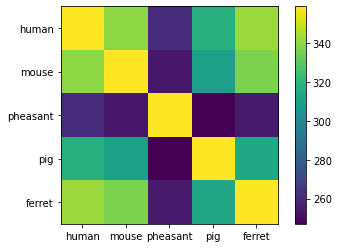

In [58]:
#Call up the FASTA file to be made into a heatplot
Fasta = list(SeqIO.parse("synthases.fasta", "fasta"))

#Initiate an empty numpy matrix that is the length of the fasta file
alignments_score = np.empty(shape=(len(Fasta),len(Fasta)))

#Create subplot
fig, ax = plt.subplots()

# Set the X-axis & Y-Axis ticks
ax.set_xticks(np.arange(len(ids)))
ax.set_yticks(np.arange(len(ids)))

# Label the X and Y axes with specific tick labels (calling the list cpds)
ax.set_xticklabels(ids)
ax.set_yticklabels(ids)

# Show alignment scores in the heatplot
plt.imshow(alignments_score)

# Instruct the heat map to show the axes
im = ax.imshow(alignments_score)

#Create a DataFrame
df =pd.DataFrame(np.random.randn(len(Fasta), len(Fasta)))

# Add a colorbar to the right of the heatmap
cbar = ax.figure.colorbar(im)

# Save a PNG file with the heatmap
plt.savefig('synthasesheatmap.png')

# Show the plot
plt.show()

#Normalize the scores
df_norm_col=(df-df.mean())/df.std()
df_norm_row=(df-df.mean())/df.std()

# Add a colorbar to the right of the heatmap
cbar = ax.figure.colorbar(im)

# Show the plot
plt.show()

## Part 4: Analysis of the results

The heatplot shows the similarities of codon sequences among all the species being compared. Every colored square represents the alignment score generated for two species' codon sequences of the sialic acid synthase. The diagonal yellow from left to right is representative of the exact similarities having the highest alignment score possible between each other. The synthase sequences that are closer alignment have a lighter color, while the species whose synthase codon sequences are more different from each other. In our hypothesis, wanted to compare the synthase sequences between pigs and ferrets to detect any potential of influenza susceptibility and participation in zoonosis to humans. According to our heatplot, the similarities between pig and ferret synthase codon sequences are less than that of the pig and human, and the ferret and pig.

Ferrets' synthases are closer related to humans than that of pigs, but the differences between ferret and pigs is more than the differences they each have from the control (mouse). In other words, pigs and ferrets do not have enough similarity to say that ferrets are another mixing vessel for influenza in the way that pigs are. Our hypothesis was not supported. In the future, to make this study better, more control species could be used, and different species of the animals of interest could be tested to potentially see if there are more susceptible species of pigs and ferrets to influenza. 